# Dataset: Opensus -> System Information Mortality - Brazil. 

Ref: https://opendatasus.saude.gov.br/dataset/sim-2020-2021

"The Mortality Information System (SIM), developed by the Ministry of Health in 1975, is the product of the unification of more than forty Death Certificate models used over the years to collect data on mortality in the country. With its long series time, the SIM is a national heritage, since it has fundamental information so that we can know the aspects related to mortality in Brazil and the causes of illness that led to death. It is also one of the main instruments to support the elaboration of public policies more effective health and social security systems aimed at prevention, promotion and health care."
https://svs.aids.gov.br/daent/cgiae/sim/apresentacao/

## Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import missingno as msno
import warnings

from datetime import datetime
from dateutil.parser import parse

warnings.filterwarnings("ignore")

In [2]:
# Global Configurations
style.use('seaborn-v0_8-whitegrid')

## Load the data

In [3]:
%reload_ext watermark
%watermark -a "Rodrigo S. Pereira" --iversions

Author: Rodrigo S. Pereira

pandas    : 1.4.1
numpy     : 1.24.2
missingno : 0.4.2
matplotlib: 3.6.0
seaborn   : 0.11.2



In [4]:
# Load the dataset
data = pd.read_csv('data/DO22OPEN.csv',sep=';', dtype={"DTOBITO":"object", "DTNASC": "object"})

In [5]:
data.head()

,contador,contador.1,ORIGEM,TIPOBITO,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,...,TPRESGINFO,TPNIVELINV,DTCADINF,MORTEPARTO,DTCONCASO,ALTCAUSA,CAUSABAS_O,TPPOS,TP_ALTERA,CB_ALT
0,1,1,1,2,13012022,1330.0,841.0,411370.0,02111950,471.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E140,N,NaN,NaN
1,2,2,1,2,15012022,1258.0,829.0,293280.0,08011961,461.0,...,NaN,NaN,NaN,NaN,NaN,NaN,K721,N,NaN,NaN
2,3,3,1,2,15012022,1800.0,829.0,292210.0,22021939,482.0,...,NaN,NaN,NaN,NaN,NaN,NaN,C249,N,NaN,NaN
3,4,4,1,2,16012022,550.0,825.0,250070.0,15071955,466.0,...,NaN,NaN,NaN,NaN,NaN,NaN,K729,N,NaN,NaN
4,5,5,1,2,16012022,1440.0,852.0,520870.0,25041955,466.0,...,NaN,NaN,NaN,NaN,NaN,NaN,A46,N,NaN,NaN


In [6]:
print(f'The data Shape n_rows and n_cols are: {data.shape}')

The data Shape n_rows and n_cols are: (1507102, 87)


## Data Preparations

In [7]:
# Verify the columns:
data.columns

Index(['contador', 'contador.1', 'ORIGEM', 'TIPOBITO', 'DTOBITO', 'HORAOBITO',
       'NATURAL', 'CODMUNNATU', 'DTNASC', 'IDADE', 'SEXO', 'RACACOR', 'ESTCIV',
       'ESC', 'ESC2010', 'SERIESCFAL', 'OCUP', 'CODMUNRES', 'LOCOCOR',
       'CODESTAB', 'CODMUNOCOR', 'IDADEMAE', 'ESCMAE', 'ESCMAE2010',
       'SERIESCMAE', 'OCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'GRAVIDEZ',
       'SEMAGESTAC', 'GESTACAO', 'PARTO', 'OBITOPARTO', 'PESO', 'TPMORTEOCO',
       'OBITOGRAV', 'OBITOPUERP', 'ASSISTMED', 'EXAME', 'CIRURGIA',
       'NECROPSIA', 'LINHAA', 'LINHAB', 'LINHAC', 'LINHAD', 'LINHAII',
       'CAUSABAS', 'CB_PRE', 'COMUNSVOIM', 'DTATESTADO', 'CIRCOBITO',
       'ACIDTRAB', 'FONTE', 'NUMEROLOTE', 'DTINVESTIG', 'DTCADASTRO',
       'ATESTANTE', 'STCODIFICA', 'CODIFICADO', 'VERSAOSIST', 'VERSAOSCB',
       'FONTEINV', 'DTRECEBIM', 'ATESTADO', 'DTRECORIGA', 'OPOR_DO',
       'CAUSAMAT', 'ESCMAEAGR1', 'ESCFALAGR1', 'STDOEPIDEM', 'STDONOVA',
       'DIFDATA', 'NUDIASOBCO', 'DTCADINV', 'TPOBITOCOR

Notes: 
    - The data set has a total of **1031744 records** and **86 variables**; 
    - From the variables present in the original dataset, we can exclude `contador`, `ORIGEM`;
   
Select the variable for the fisrt analysis:   
    - `TIPOBITO`: Fetal/Nao Fetal;  
    - `DTOBITO`: Data do óbito formato ddmmaaa.  
    - `DTNASC`: Data do nascimento do falecido, formato ddmmaaaa.   
    - `IDADE`: Idade do falecido em minutos, horas, dias, meses ou anos.  
.    - `SEXO`:.  
    - `RACACOR`: raça e cor.  
    - `ESTCIV`: estado civil.  
    - `ESC2010`: nível da escolaridade.  
    - `ESC`: Escolaridade por tempo.  
    - `OCUP`: Tipo de trabalho que o falecido desenvolveu na maior parte de sua vida
            produtiva.  
    - `LOCOCOR`: Local de ocorrencia do óbito.  
    - `CODMUNOCOR`: código do municipio onde ocorreu o óbito.  
    - `OBITOGRAV`: Óbito na gravidez.  
    - `OBITOPUERP`: Óbito no puerpério.  
    - `LINHAA`:.  
    - `LINHAB`:.   
    - `LINHAC`:.  
    - `LINHAD`:.  
    - `LINHAII`:.  
    - `CAUSABAS`: Causa básica da DO.   
    - `CIRCOBITO`: Tipo de morte violenta ou circunstâncias em que se deu a morte não natural.  
    - `ACIDTRAB`: Indica se o evento que desencadeou o óbito está relacionado ao processo de
                trabalho.  
    - `ASSISTMED`: assistencia médica antes da ocorrencia do óbito.  
    
    

In [8]:
# Select the variables for this first data exploratory: 
select_var = ['TIPOBITO', 'DTOBITO', 'DTNASC', 'IDADE', 'SEXO', 'RACACOR', 'ESTCIV','ESC2010',
             'ESC', 'OCUP', 'LOCOCOR', 'CODMUNOCOR', 'OBITOGRAV', 'OBITOPUERP', 'LINHAA', 'LINHAB',
             'LINHAC', 'LINHAD', 'LINHAII', 'CAUSABAS', 'CIRCOBITO', 'ACIDTRAB', 'ASSISTMED']

**Put here some explanation, why this select_var set** #########

In [9]:
df = data[select_var]
df.shape

(1507102, 23)

### Missing Values

In [10]:
# Function for count and return new dataframe with the relation about null values
def count_df_null(data):
    df_l = pd.DataFrame(data.isnull().sum().sort_values(), columns=['Total null'])
    df_l['%'] = df_l['Total null']/data.shape[0]*100
    return df_l

In [11]:
# Verify the value null in all dataframe and that % of total observations
count_df_null(df)

,Total null,%
TIPOBITO,0,0.000000
CAUSABAS,0,0.000000
LOCOCOR,0,0.000000
SEXO,0,0.000000
CODMUNOCOR,0,0.000000
DTOBITO,0,0.000000
IDADE,26419,1.752967
DTNASC,29400,1.950764
LINHAA,46972,3.116710
RACACOR,55292,3.668763


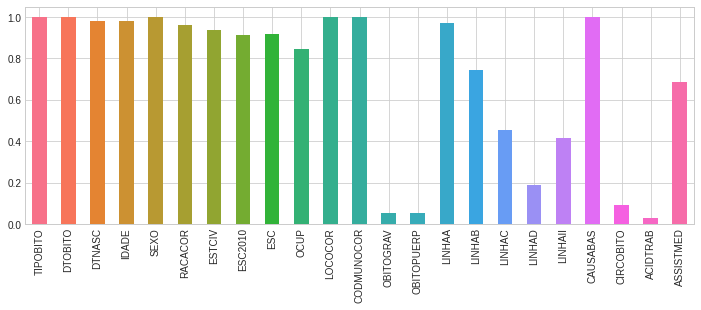

In [12]:
# Plot summary about missing values: 
colors = sns.color_palette('husl', len(select_var))
fig, ax = plt.subplots(figsize=(12,4))
ax = (1 - df.isnull().mean()).plot.bar(color=colors)

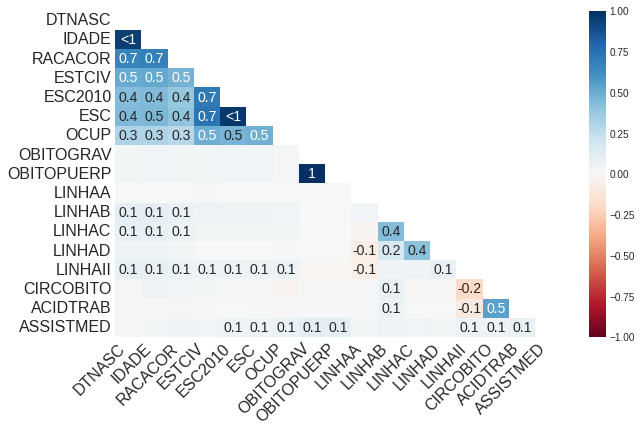

In [13]:
# Heatmap for correlation between missing values
ax = msno.heatmap(df, figsize=(10,6))

### Data cleaning

* We consider trunced variable with no more with 20% of lost data. 

In [14]:
select_var = count_df_null(df)[count_df_null(df)['%'] < 20].index.values
select_var

array(['TIPOBITO', 'CAUSABAS', 'LOCOCOR', 'SEXO', 'CODMUNOCOR', 'DTOBITO',
       'IDADE', 'DTNASC', 'LINHAA', 'RACACOR', 'ESTCIV', 'ESC', 'ESC2010',
       'OCUP'], dtype=object)

In [15]:
# Filtering the data by select_var and atribute to new df2: 
df2 = df[select_var]
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1507102 entries, 0 to 1507101
Data columns (total 14 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   TIPOBITO    1507102 non-null  int64  
 1   CAUSABAS    1507102 non-null  object 
 2   LOCOCOR     1507102 non-null  int64  
 3   SEXO        1507102 non-null  int64  
 4   CODMUNOCOR  1507102 non-null  int64  
 5   DTOBITO     1507102 non-null  object 
 6   IDADE       1480683 non-null  float64
 7   DTNASC      1477702 non-null  object 
 8   LINHAA      1460130 non-null  object 
 9   RACACOR     1451810 non-null  float64
 10  ESTCIV      1412335 non-null  float64
 11  ESC         1386518 non-null  float64
 12  ESC2010     1379011 non-null  float64
 13  OCUP        1271115 non-null  float64
dtypes: float64(6), int64(4), object(4)
memory usage: 161.0+ MB


Select process for the representative variable, now we need to work on the change some data for put in better visualization and a post processing of the exploratory data. 

Relation of the select variable and how is the process for apply: 
* `TIPOBITO`: Change the number 1 to fetal and 2 to not fetal.

In [16]:
# Ajustment of var TIPOBITO: 
df2.TIPOBITO = df2.TIPOBITO.replace(2, 'Not_Fetal')
df2.TIPOBITO = df2.TIPOBITO.replace(1, 'Fetal')

In [17]:
df2.shape
print(f'The new data df2 Shape n_rows and n_cols are: {df2.shape}')

The new data df2 Shape n_rows and n_cols are: (1507102, 14)


In [18]:
df2.head(3)

,TIPOBITO,CAUSABAS,LOCOCOR,SEXO,CODMUNOCOR,DTOBITO,IDADE,DTNASC,LINHAA,RACACOR,ESTCIV,ESC,ESC2010,OCUP
0,Not_Fetal,E140,1,2,354780,13012022,471.0,02111950,*J180,2.0,3.0,3.0,1.0,999992.0
1,Not_Fetal,K721,1,1,354780,15012022,461.0,08011961,*A419,4.0,4.0,5.0,5.0,821415.0
2,Not_Fetal,C249,1,2,354780,15012022,482.0,22021939,*C249,4.0,3.0,3.0,2.0,999992.0


In [19]:
# Verify the df2 na values: 
count_df_null(df2)

,Total null,%
TIPOBITO,0,0.000000
CAUSABAS,0,0.000000
LOCOCOR,0,0.000000
SEXO,0,0.000000
CODMUNOCOR,0,0.000000
DTOBITO,0,0.000000
IDADE,26419,1.752967
DTNASC,29400,1.950764
LINHAA,46972,3.116710
RACACOR,55292,3.668763


* **The observations with contain nan values for this variables above are substituted for "not_informed"**

In [20]:
# Treatment of nan values: 
df2.fillna(value='not_informed', inplace=True)

In [21]:
df2.head(3)

,TIPOBITO,CAUSABAS,LOCOCOR,SEXO,CODMUNOCOR,DTOBITO,IDADE,DTNASC,LINHAA,RACACOR,ESTCIV,ESC,ESC2010,OCUP
0,Not_Fetal,E140,1,2,354780,13012022,471.0,02111950,*J180,2.0,3.0,3.0,1.0,999992.0
1,Not_Fetal,K721,1,1,354780,15012022,461.0,08011961,*A419,4.0,4.0,5.0,5.0,821415.0
2,Not_Fetal,C249,1,2,354780,15012022,482.0,22021939,*C249,4.0,3.0,3.0,2.0,999992.0



**Summary transformation about Variables:** 

    - SEXO: {0:"ignored", 1:"masculine", 2:"feminine"} 
    
    - LOCOCOR: Place of occurrence of death; We need to change the class number to word for help the future representations. {1:"hospital", 2:"others hospitals", 3:"health", 4:"public highway", 5:"others", 6:"indian village", 9:"ignored"};      
    
    - *IDADE: 1ºX-2ºXX - for the 1ºX={1:minute; 2:hour; 3:month; 4:year; 5:secular}
                                2ºXX={unit of measurement respective the 1ºX};      
    
    - *RACACOR: ethnic identity - {1: white, 2: black, 3:yellow, 4:Brown, 5:Indigenous}
    * Observation: It is important to note that these terms are not widely accepted in English, as they are often considered to be reductive and potentially offensive. Instead of using these terms, it is more appropriate to use terms that accurately and respectfully describe a person's racial or ethnic identity. For example, "White" can be described as "Caucasian" or "European American", "Black" can be described as "African American", "Yellow" is not a commonly used term, "Brown" can be described as "Latino" or "Hispanic", and "Indigenous" can be described as "Native American" or "Aboriginal".
    
     - *ESTCIV: Marital status of the deceased as reported by relatives. {1:Single; 2:Married; 3:Widowed; 4:separated/divorced; 5:Common-law marriage; 9:Unknown)
    
    - *ESC: Years of schooling. {1:"None", 2:"1 to 3 years", 3:"4 to 7 years", 4:"8 to 11 years", 5:"12 or more years", 9:"Unknown"};
    
    - *ESC2010: Level of the last grade completed by the deceased. {0:"No education", 1:"Primary education (1st to 4th grade)", 2:"Secondary education (5th to 8th grade)", 3:"High school (former 2nd degree)", 4:"Incomplete higher education"; 5:"Completed higher education", 9:"Unknown"};

In [22]:
# Create a relation variable for the LOCOCOR, IDADE, RACACOR, ESTCIV, ESC, ESC2010 and SEXO
dic_LOCOCOR = {1:"hospital", 2:"others hospitals", 3:"health", 4:"public highway", 
               5:"others", 6:"indian village", 9:"ignored"}
dic_SEXO = {0:"ignored", 1:"masculine", 2:"feminine"}
dic_IDADE = {1:"minute", 2:"hour", 3:"month", 4:"year", 5:"secular"}
dic_RACACOR = {1: "white", 2:"black", 3:"yellow", 4:"Brown", 5:"Indigenous"}
dic_ESTCIV = {1:"Single", 2:"Married", 3:"Widowed", 4:"separated/divorced", 5:"Common-law marriage", 9:"Unknown"}
dic_ESC = {1:"None", 2:"1 to 3 years", 3:"4 to 7 years", 4:"8 to 11 years", 5:"12 or more years", 9:"Unknown"}
dic_ESC2010 = {0:"No education", 1:"Primary education (1st to 4th grade)", 2:"Secondary education (5th to 8th grade)",
               3:"High school (former 2nd degree)", 4:"Incomplete higher education", 5:"Completed higher education", 9:"Unknown"}
columns_to_update = {'LOCOCOR': dic_LOCOCOR,
                     'RACACOR': dic_RACACOR,
                     'ESTCIV': dic_ESTCIV,
                     'ESC': dic_ESC,
                     'ESC2010': dic_ESC2010,
                     'SEXO': dic_SEXO}

In [23]:
# Update the columns_to_update
def update_column_values(df, column, dic_name):
    df[column] = df[column].apply(lambda x: x if x == 'not_informed' else dic_name[x])

for column, dic_name in columns_to_update.items():
    update_column_values(df2, column, dic_name)

In [24]:
df2.head(3)

,TIPOBITO,CAUSABAS,LOCOCOR,SEXO,CODMUNOCOR,DTOBITO,IDADE,DTNASC,LINHAA,RACACOR,ESTCIV,ESC,ESC2010,OCUP
0,Not_Fetal,E140,hospital,feminine,354780,13012022,471.0,02111950,*J180,black,Widowed,4 to 7 years,Primary education (1st to 4th grade),999992.0
1,Not_Fetal,K721,hospital,masculine,354780,15012022,461.0,08011961,*A419,Brown,separated/divorced,12 or more years,Completed higher education,821415.0
2,Not_Fetal,C249,hospital,feminine,354780,15012022,482.0,22021939,*C249,Brown,Widowed,4 to 7 years,Secondary education (5th to 8th grade),999992.0


* Obs: The most values unique demonstrate with have some patterns with just two digits, like example "50" or "16", and this don't represent the valid number for IDADE based on the subtitle of dictionary on document.

* For this analisys we assume just the frequency time about completed years, for values with represent less than year we assum new value like "less_year". And the values with contain two digits is represent by "not_inform". 

In [25]:
#Function for select the 2 digits of variable IDADE and change for "not_inform"
def select_digits(digit):
    digit_str = str(int(digit))
    if len(digit_str) < 3:
        return 0
    if digit_str[0] in '123':
        return 9
    return int(digit)

In [26]:
# Apply the select_digits:
df2.IDADE = df2.IDADE.apply(lambda x: select_digits(x) if x != 'not_informed' else 0)

# Create a new column by represent the frequency time: 
dic_IDADE.update({0:'not_informed', 9:'less_year'})
df2.insert(7, column='Freq_time', value=df2.IDADE.apply(lambda x: dic_IDADE[int(list(str(x))[0])]))

# Modify the var IDADE, exclude the first digit when is 4 and change for 1 when is 5: 
def modify_age(cod):
    condition = (str(cod).startswith('5') and len(str(cod)) == 3) or (str(cod).startswith('4') and len(str(cod)) == 3)
    if condition:
        return int(str(cod)[1:])
    else:
        return cod
    
    
df2.IDADE = df2.IDADE.apply(lambda x: modify_age(x))

In [27]:
df2.head(10)

,TIPOBITO,CAUSABAS,LOCOCOR,SEXO,CODMUNOCOR,DTOBITO,IDADE,Freq_time,DTNASC,LINHAA,RACACOR,ESTCIV,ESC,ESC2010,OCUP
0,Not_Fetal,E140,hospital,feminine,354780,13012022,71,year,02111950,*J180,black,Widowed,4 to 7 years,Primary education (1st to 4th grade),999992.0
1,Not_Fetal,K721,hospital,masculine,354780,15012022,61,year,08011961,*A419,Brown,separated/divorced,12 or more years,Completed higher education,821415.0
2,Not_Fetal,C249,hospital,feminine,354780,15012022,82,year,22021939,*C249,Brown,Widowed,4 to 7 years,Secondary education (5th to 8th grade),999992.0
3,Not_Fetal,K729,hospital,feminine,354780,16012022,66,year,15071955,*K729,white,Married,4 to 7 years,Secondary education (5th to 8th grade),999992.0
4,Not_Fetal,A46,hospital,feminine,354780,16012022,66,year,25041955,*A419,Brown,Single,8 to 11 years,High school (former 2nd degree),999992.0
5,Fetal,P95,hospital,masculine,420430,12012022,0,not_informed,not_informed,*P95X,not_informed,not_informed,not_informed,not_informed,not_informed
6,Fetal,P011,hospital,feminine,420430,02012022,0,not_informed,not_informed,*P011,not_informed,not_informed,not_informed,not_informed,not_informed
7,Not_Fetal,Y099,hospital,masculine,420430,04012022,21,year,22082000,*S069,white,Single,8 to 11 years,High school (former 2nd degree),513405.0
8,Not_Fetal,R99,health,masculine,420430,17012022,76,year,27101945,*R99X,white,Widowed,None,No education,621005.0
9,Not_Fetal,I639,hospital,feminine,420430,17012022,94,year,18071927,*J189,white,Widowed,1 to 3 years,Primary education (1st to 4th grade),621005.0


Aqui vamos tomar uma decisão: Realizar as trasnformações de cada variável categórica para seus respectivos significados é uma tarefa redundante. A análise exploratória pode partir dessa premissa inicial, e após os resultados realizarmos as devidas transformaçẽos de registros para ajustar uma melhor compreensão no ambiente de visualização dos dados.

Estaremos interessados somente nas mortes de origem Não Fetal. Portanto iremos atribuir uma cópia do df2 para um novo dataset onde será suprimido a coluna `TIPOBITO`

In [28]:
# Create a new dataframe with contain just `TIPOBITO` == "Not_Fetal"
df3 = df2.query('TIPOBITO == "Not_Fetal"').drop('TIPOBITO', axis=1)

In [29]:
df3.shape

(1480683, 14)

### Checkpoint A
Checkpoint:  Salvar as alterações realizadas no dataset original para posteriores consultas. 

In [30]:
df3.to_csv('data/data_checkpointA.csv', index=False)

## Exploratory Data Analysis

In [31]:
# Load the dataframe by checkpoint A: 
data = pd.read_csv('data/data_checkpointA.csv')
print(f'The shape of data:{data.shape}')

The shape of data:(1480683, 14)


In [32]:
data.head()

,CAUSABAS,LOCOCOR,SEXO,CODMUNOCOR,DTOBITO,IDADE,Freq_time,DTNASC,LINHAA,RACACOR,ESTCIV,ESC,ESC2010,OCUP
0,E140,hospital,feminine,354780,13012022,71,year,02111950,*J180,black,Widowed,4 to 7 years,Primary education (1st to 4th grade),999992.0
1,K721,hospital,masculine,354780,15012022,61,year,08011961,*A419,Brown,separated/divorced,12 or more years,Completed higher education,821415.0
2,C249,hospital,feminine,354780,15012022,82,year,22021939,*C249,Brown,Widowed,4 to 7 years,Secondary education (5th to 8th grade),999992.0
3,K729,hospital,feminine,354780,16012022,66,year,15071955,*K729,white,Married,4 to 7 years,Secondary education (5th to 8th grade),999992.0
4,A46,hospital,feminine,354780,16012022,66,year,25041955,*A419,Brown,Single,8 to 11 years,High school (former 2nd degree),999992.0


In [33]:
# Verificando se há "not_informed" na coluna Freq_time
data.Freq_time.unique()

array(['year', 'less_year', 'secular', 'not_informed'], dtype=object)

In [34]:
data.query('Freq_time == "not_informed"').shape

(2464, 14)